<a href="https://colab.research.google.com/github/RABIN-0/Lab-Assignment-1/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
def load_dataset(file_path):
  return pd.read_csv(file_path)


df = load_dataset("/Premier_League_players.csv")
df

,№,Player,Team,Apps,Min,G,A,xG,xA,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99-6.01,7.85+0.85,0.50,0.23
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36+1.36,9.79-3.21,0.80,0.32
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21-0.79,4.42+1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69+3.69,9.82+0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83+0.83,5.27+3.27,0.53,0.17
...,...,...,...,...,...,...,...,...,...,...,...
532,533,Chiquinho,Wolverhampton Wanderers,8,191,0,3,0.56+0.56,1.09-1.91,0.26,0.51
533,534,Josh Dasilva,Brentford,9,242,0,0,0.10+0.10,0.18+0.18,0.04,0.07
534,535,Daniel Chesters,West Ham,1,1,0,0,0,0,0.00,0.00
535,536,Tony Springett,Norwich,3,138,0,0,0.52+0.52,0.51+0.51,0.34,0.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   №       537 non-null    int64  
 1   Player  537 non-null    object 
 2   Team    537 non-null    object 
 3   Apps    537 non-null    int64  
 4   Min     537 non-null    int64  
 5   G       537 non-null    int64  
 6   A       537 non-null    int64  
 7   xG      537 non-null    object 
 8   xA      537 non-null    object 
 9   xG90    537 non-null    float64
 10  xA90    537 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 46.3+ KB


In [7]:
df['Team'].unique()

array(['Tottenham', 'Liverpool', 'Manchester United', 'Manchester City',
       'Leicester', 'Crystal Palace', 'Brentford', 'West Ham', 'Arsenal',
       'Norwich', 'Chelsea', 'Leeds', 'Aston Villa', 'Southampton',
       'Everton', 'Watford', 'Burnley', 'Newcastle United', 'Brighton',
       'Wolverhampton Wanderers', 'Burnley,\xa0Newcastle United',
       'Leeds,\xa0Manchester United', 'Everton,\xa0Manchester United',
       'Arsenal,\xa0Aston Villa', 'Everton,\xa0Tottenham',
       'Aston Villa,\xa0Newcastle United', 'Aston Villa,\xa0Everton',
       'Brighton,\xa0Newcastle United'], dtype=object)

In [8]:
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

df = filter_rows_by_values(df, "Team", ['Burnley,\xa0Newcastle United',
       'Leeds,\xa0Manchester United', 'Everton,\xa0Manchester United',
       'Arsenal,\xa0Aston Villa', 'Everton,\xa0Tottenham',
       'Aston Villa,\xa0Newcastle United', 'Aston Villa,\xa0Everton',
       'Brighton,\xa0Newcastle United'])

In [9]:
df['Team'].unique()

array(['Tottenham', 'Liverpool', 'Manchester United', 'Manchester City',
       'Leicester', 'Crystal Palace', 'Brentford', 'West Ham', 'Arsenal',
       'Norwich', 'Chelsea', 'Leeds', 'Aston Villa', 'Southampton',
       'Everton', 'Watford', 'Burnley', 'Newcastle United', 'Brighton',
       'Wolverhampton Wanderers'], dtype=object)

<Axes: ylabel='Team'>

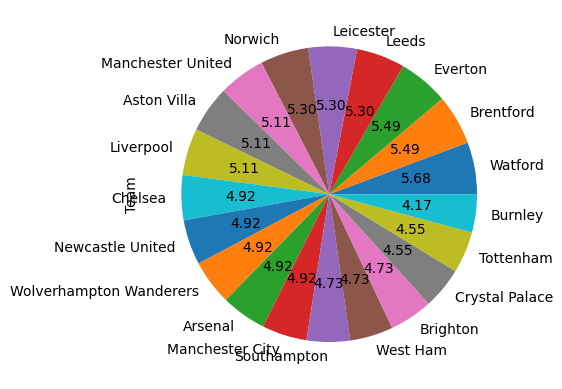

In [10]:
df['Team'].value_counts().plot(kind='pie',autopct='%0.2f')

<Axes: xlabel='G', ylabel='Team'>

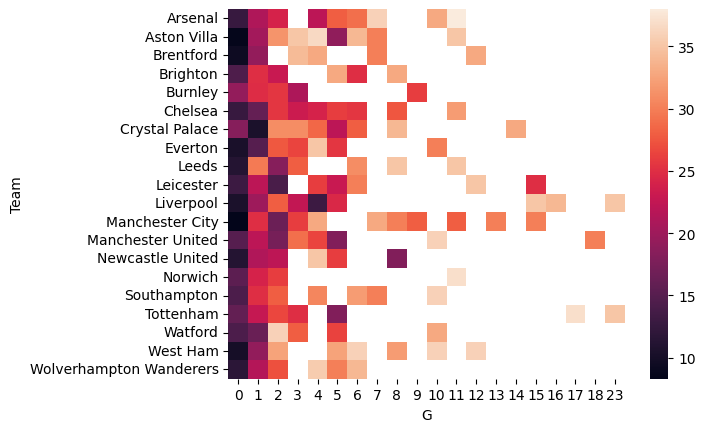

In [11]:
sns.heatmap(df.pivot_table(values='Apps',index='Team',columns='G'))

<Axes: xlabel='G', ylabel='Apps'>

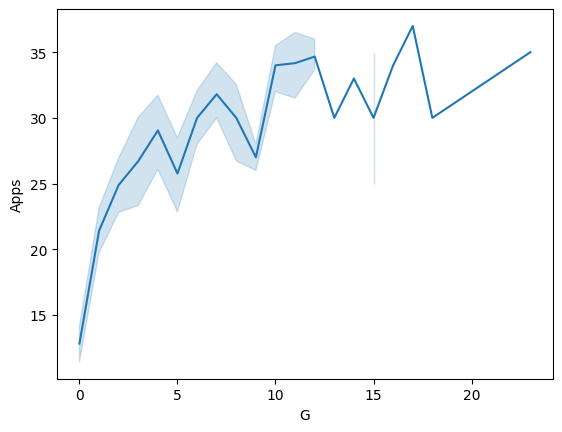

In [12]:
sns.lineplot(x='G',y='Apps',data=df)

In [13]:
Arsenal=df[df["Team"]=='Arsenal']
Arsenal.head(10)

,№,Player,Team,Apps,Min,G,A,xG,xA,xG90,xA90
14,15,Bukayo Saka,Arsenal,38,3034,11,7,9.91-1.09,7.63+0.63,0.29,0.23
23,24,Emile Smith-Rowe,Arsenal,33,1928,10,2,5.36-4.64,3.03+1.03,0.25,0.14
40,41,Martin Odegaard,Arsenal,36,2803,7,4,4.22-2.78,6.60+2.60,0.14,0.21
53,54,Gabriel Martinelli,Arsenal,29,1877,6,6,8.86+2.86,4.08-1.92,0.43,0.20
65,66,Gabriel,Arsenal,35,3075,5,0,3.54-1.46,0.25+0.25,0.10,0.01
68,69,Eddie Nketiah,Arsenal,21,803,5,1,4.99-0.01,1.67+0.67,0.56,0.19
80,81,Pierre-Emerick Aubameyang,Arsenal,14,1047,4,1,6.89+2.89,0.80-0.20,0.59,0.07
88,89,Alexandre Lacazette,Arsenal,30,1800,4,7,7.63+3.63,3.26-3.74,0.38,0.16
152,153,Thomas Partey,Arsenal,24,2045,2,1,3.02+1.02,0.87-0.13,0.13,0.04
182,183,Granit Xhaka,Arsenal,27,2338,1,2,1.11+0.11,2.42+0.42,0.04,0.09


In [14]:
Arsenal.sort_values(by=["G"],ascending=False)[0:10]

,№,Player,Team,Apps,Min,G,A,xG,xA,xG90,xA90
14,15,Bukayo Saka,Arsenal,38,3034,11,7,9.91-1.09,7.63+0.63,0.29,0.23
23,24,Emile Smith-Rowe,Arsenal,33,1928,10,2,5.36-4.64,3.03+1.03,0.25,0.14
40,41,Martin Odegaard,Arsenal,36,2803,7,4,4.22-2.78,6.60+2.60,0.14,0.21
53,54,Gabriel Martinelli,Arsenal,29,1877,6,6,8.86+2.86,4.08-1.92,0.43,0.20
65,66,Gabriel,Arsenal,35,3075,5,0,3.54-1.46,0.25+0.25,0.10,0.01
68,69,Eddie Nketiah,Arsenal,21,803,5,1,4.99-0.01,1.67+0.67,0.56,0.19
80,81,Pierre-Emerick Aubameyang,Arsenal,14,1047,4,1,6.89+2.89,0.80-0.20,0.59,0.07
88,89,Alexandre Lacazette,Arsenal,30,1800,4,7,7.63+3.63,3.26-3.74,0.38,0.16
152,153,Thomas Partey,Arsenal,24,2045,2,1,3.02+1.02,0.87-0.13,0.13,0.04
236,237,Nicolas Pepe,Arsenal,20,646,1,2,3.45+2.45,1.33-0.67,0.48,0.19


<BarContainer object of 5 artists>

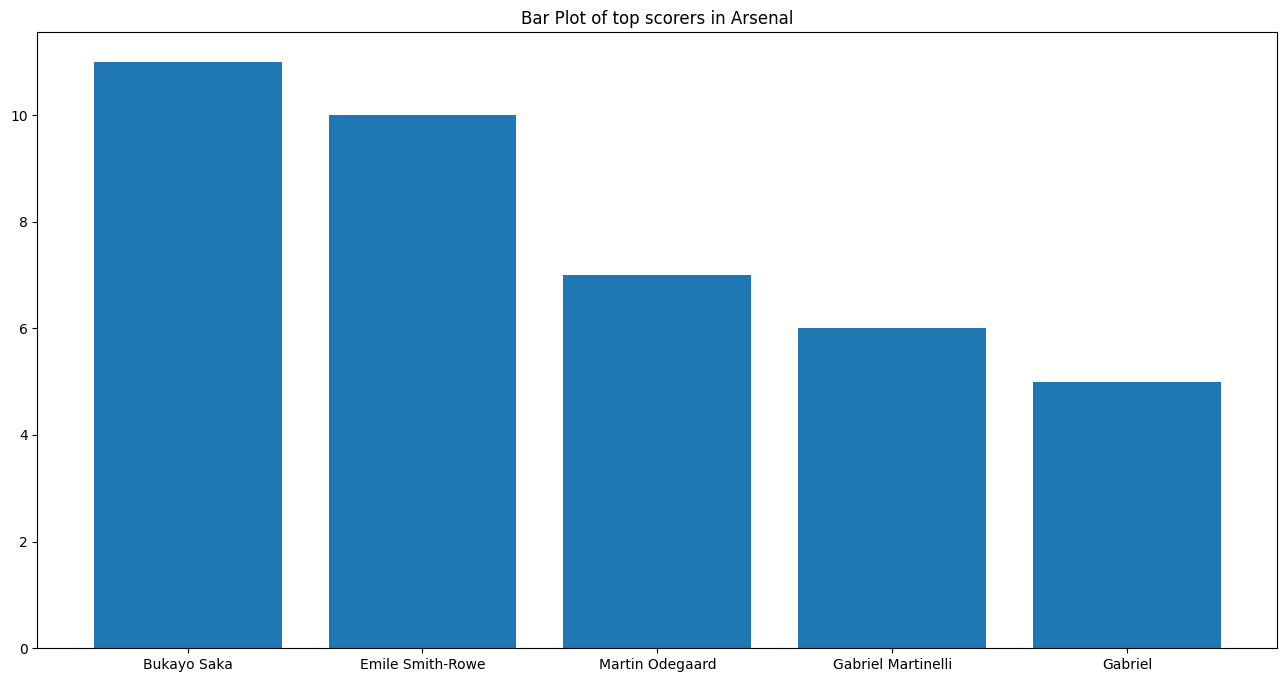

In [15]:
plt.figure(figsize=(16,8))
plt.title("Bar Plot of top scorers in Arsenal")
plt.bar(list(Arsenal["Player"])[0:5],list(Arsenal["G"])[0:5])

<Axes: ylabel='G'>

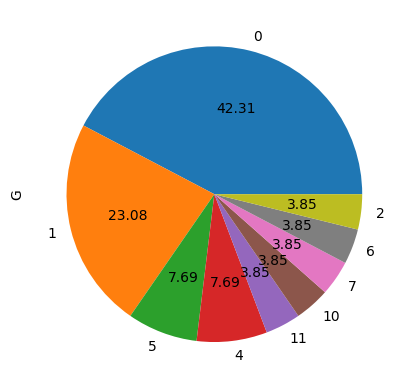

In [16]:
Arsenal['G'].value_counts().plot(kind='pie',autopct='%0.2f')

<Axes: xlabel='Apps', ylabel='G'>

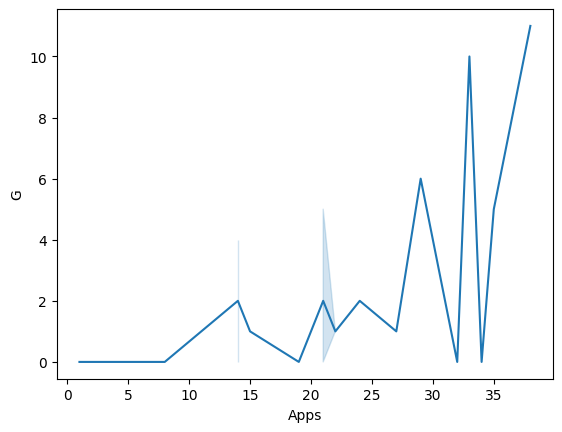

In [18]:
sns.lineplot(x='Apps',y='G',data=Arsenal)

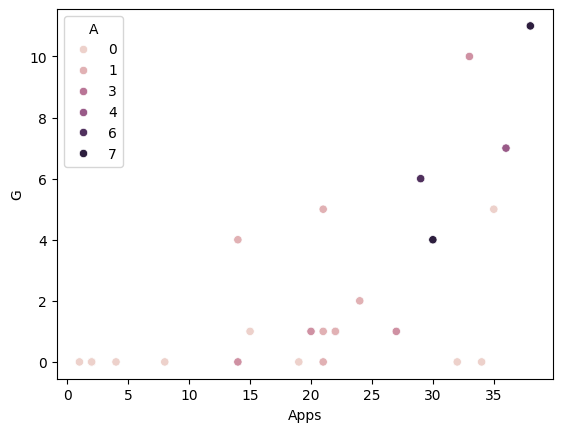

In [21]:
sns.scatterplot(x='Apps', y='G',hue='A',data=Arsenal)
plt.show()